# Lab Four for UW AMATH 563
## Assignment: Convolutional Neural Nets (CNNs)
## By Rebecca Lopez

In this assignmenet, we implement LeNet in PyTorch with tanh activation and Adam Optimizer and achieve greater than 95% accuracy on the MNIST classification task.

In [86]:
#Import Necessary Packages & Libraries
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn
import random
from tabulate import tabulate
from torch.autograd import Variable
import torch
import torchvision

In [87]:
#Define train batch size
train_batch_size = 100 
#Define test batch size
test_batch_size  = 100 


# Use the following code to load and normalize the dataset
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=train_batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=test_batch_size, shuffle=True)

In [88]:
class LeNet5(nn.Module):

    def __init__(self, n_classes):
        super(LeNet5, self).__init__()
        
        #Activation Function
        self.activ = nn.Tanh()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=6, 
                              kernel_size=(5,5), stride=1, padding=0)
        
        # Average pool 
        self.pool = nn.AvgPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=6, out_channels=16, 
                              kernel_size=(5,5), stride=1, padding=0)
        
        # Convolution 3
        self.cnn3 = nn.Conv2d(in_channels=16, out_channels=120, 
                            kernel_size=(5,5), stride=1, padding=0)
        
        self.fc = nn.Linear(256,120)
        
        # Fully connected 1
        self.fc1 = nn.Linear(120, 84) 
        torch.nn.init.kaiming_normal_(self.fc1.weight)
        
        # Fully connected 2
        self.fc2 = nn.Linear(84, 10) 
        torch.nn.init.kaiming_normal_(self.fc2.weight)
        
        #SoftMax for Probabilities
        self.sft =nn.Softmax()
        
        self.dropout=nn.Dropout(0.24)
        
        #define LeNet5

    def forward(self, x):
        #Define forward pass
        
        # Input x dimensions:   #nx1x32x32
        
        # Set 1
        out = self.cnn1(x)      #nx6x28x28
        out = self.activ(out) 
        out = self.pool(out)#nx6x14x14
        
        # Set 2
        out = self.cnn2(out)    #nx16x10x10
        out = self.activ(out)   
        out = self.pool(out) #nx16x5x5
        
        #Flatten
        out = out.view(out.size(0), -1) #nx120
        
        #Set3
        out = self.fc(out)    #nx16x10x10
        out = self.activ(out)   

        #Dense
        out = self.fc1(out)     #nx84
        out = self.activ(out)
        out = self.fc2(out)     #nx10
        out = self.sft(out)
        
        return out   #can also return probabilities
                        #by performing softmax

In [89]:
# CNN model training

#Define hyperparameters
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
num_epochs = 10

model = LeNet5(10)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error   = nn.CrossEntropyLoss()
prob_list=np.zeros(len(train_loader),)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = model(train)
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()

        count += 1
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                # Forward propagation
                outputs = model(test)
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                prob=torch.max(outputs.data, 1)[0]
                
                # Total number of labels
                total += len(labels)
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))


<ipython-input-88-3c157f2fdfcb>:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.sft(out)


Iteration: 500  Loss: 1.558610200881958  Accuracy: 94.36000061035156 %
Iteration: 1000  Loss: 1.4874337911605835  Accuracy: 96.88999938964844 %
Iteration: 1500  Loss: 1.4796289205551147  Accuracy: 97.55999755859375 %
Iteration: 2000  Loss: 1.462895393371582  Accuracy: 97.66999816894531 %
Iteration: 2500  Loss: 1.4648460149765015  Accuracy: 97.94000244140625 %
Iteration: 3000  Loss: 1.490632176399231  Accuracy: 98.20999908447266 %
Iteration: 3500  Loss: 1.4855653047561646  Accuracy: 98.01000213623047 %
Iteration: 4000  Loss: 1.4793906211853027  Accuracy: 98.41000366210938 %
Iteration: 4500  Loss: 1.492181420326233  Accuracy: 98.2699966430664 %
Iteration: 5000  Loss: 1.4742844104766846  Accuracy: 98.2699966430664 %
Iteration: 5500  Loss: 1.4717357158660889  Accuracy: 98.29000091552734 %
Iteration: 6000  Loss: 1.4682402610778809  Accuracy: 98.58999633789062 %


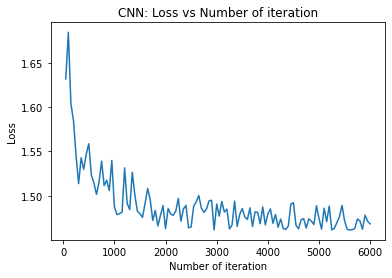

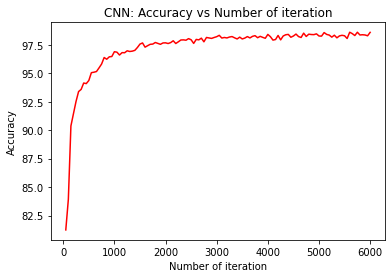

In [90]:
#Plot for Training loss as a function of iteration count
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

#Plot for Validation Accuracy as a function of iteration count
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

<ipython-input-88-3c157f2fdfcb>:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.sft(out)


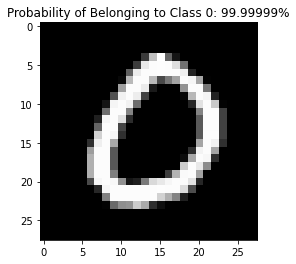

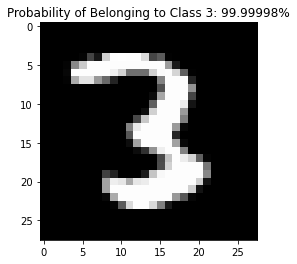

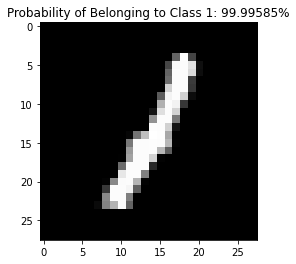

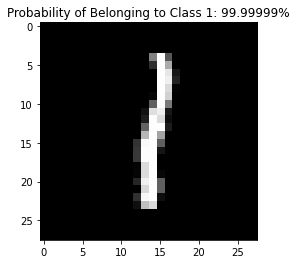

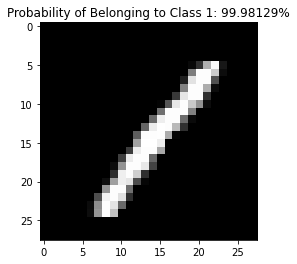

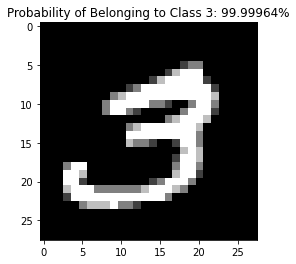

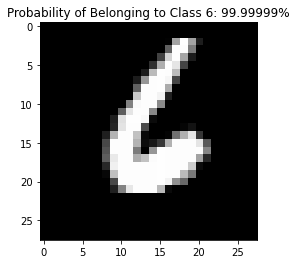

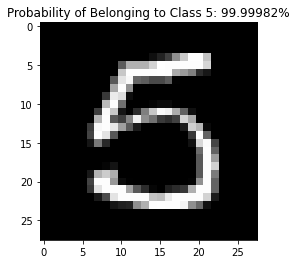

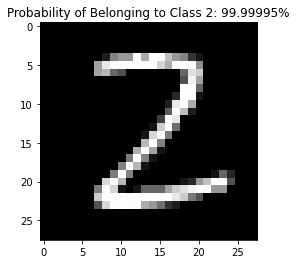

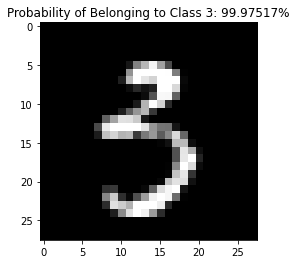

In [95]:
#Produce 10 images with class and predicted class with probability
with torch.no_grad():
    for image,label in test_loader:
        out=model(image)
        prediction=torch.argmax(out,dim=1)
           
    for i in range(10):
        plt.imshow(image.detach().numpy()[i,0,:,:],cmap="gray")
        plt.title("Probability of Belonging to Class {}: {:.5%}".format(int(prediction[i]), float(out[i, label[i]])))
        plt.show()